In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='petal_length', ylabel='petal_width'>

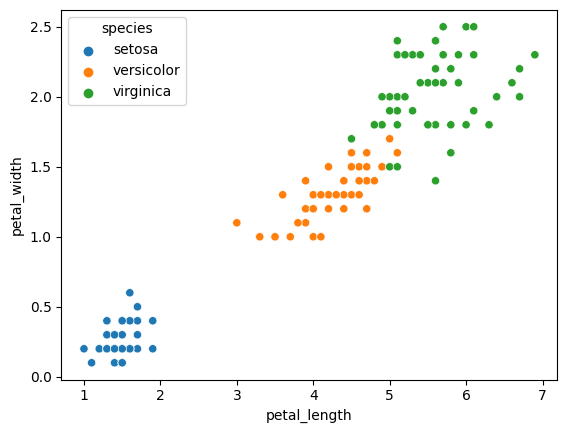

In [55]:
sns.scatterplot(df, x  ='petal_length' , y = 'petal_width', hue= 'species')

In [56]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
X = df.drop('species', axis = 1)

In [58]:
y = df['species']

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [63]:
log_reg = LogisticRegression(multi_class='ovr', max_iter= 5000, solver = 'saga')

In [64]:
penalty = ['l1', 'l2', 'elastic']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0,1,20)
param_grid = {'penalty': penalty,
              'l1_ratio': l1_ratio,
              'C': C}


In [65]:
grid_model = GridSearchCV(log_reg, param_grid= param_grid)

In [91]:
logistic_model = grid_model.fit(scaled_X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

In [92]:
y_pred = grid_model.predict(scaled_X_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [94]:
accuracy_score(y_test, y_pred)

1.0

In [95]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [97]:
import pickle

In [98]:
with open('iris_dataset.pickle' ,'wb') as f:
    pickle.dump(logistic_model,f)

In [99]:
with open('iris_dataset.pickle', 'rb') as f:
    loaded_model = pickle.load(f)
    

In [100]:
type(loaded_model)

sklearn.model_selection._search.GridSearchCV

In [108]:
x_test = [[5.0,3.2,1.2,0.2]]

In [109]:
loaded_model.predict(x_test)

array(['versicolor'], dtype=object)